# Первая лабораторная работа по Методам Оптимизации в Машинном обучении

**Необходимые библиотеки и константы в лабораторной:**

In [ ]:
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
#const
x0 = 10
y0 = 10
g_alpha = 0.067
alpha = g_alpha
EPS = 1e-8
cnt_grad = 0
cnt_function = 0

## Основное задание

Реализовать и исследовать на эффективность следующие методы:

1.   Метод градиентного спуска с постоянным шагом (learning rate)
2.   $\forall$ метод одномерного поиска и градиентный спуск на его основе
3.   Метод Нелдера-Мида, при этом:
  *   Изучить возможности библиотеки [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)
  *   Использовать готовую реализацию из этой библиотеки


### Как исследовать:
Для исследования необходимо подобрать 2-3 квадратичные функции двух переменных, на которых эффективность методов будет явно отличаться.

Сравнить методы на каждой из этих функциях:

1. Исследовать сходимость и сравнить эффективность методов на выбранных функциях, с учетом количества итераций и количества вычислений значений минимизируемой функции и ее градиентов, в зависимости от желаемой точности
2. Исследовать работу методов в зависимости от выбора начальной точки
3. В каждом случае показать примеры. Нарисовать графики рассматриваемых функций (3D), нарисовать графики с линиями уровня и траекториями методов (2D, в области задания). Вычисленные значения оформить в виде сравнительных таблиц.




## Квадратичные функции 2-х переменных, на которых будут проверяться методы

### Первая функция
$f_1(x, y) = x^2 - 4xy + 8y^2$

$∇f_1(x, y) = ⟨\frac{\partial f_1}{\partial x}, \frac{\partial f_1}{\partial y}⟩,\ \text{где} \\ \frac{\partial f_1}{\partial x} = 2x - 4y \\ \frac{\partial f_1}{\partial y} = -4x + 16y$

In [ ]:
def f1(parameters):
  global cnt_function
  cnt_function += 1
  x, y = parameters
  return x * x - 4 * x * y + 8 * y * y

def df1x(parameters):
  global cnt_grad
  cnt_grad += 1
  x, y = parameters
  return 2 * x - 4 * y

def df1y(parameters):
  x, y = parameters
  return -4 * x + 16 * y

График первой функции

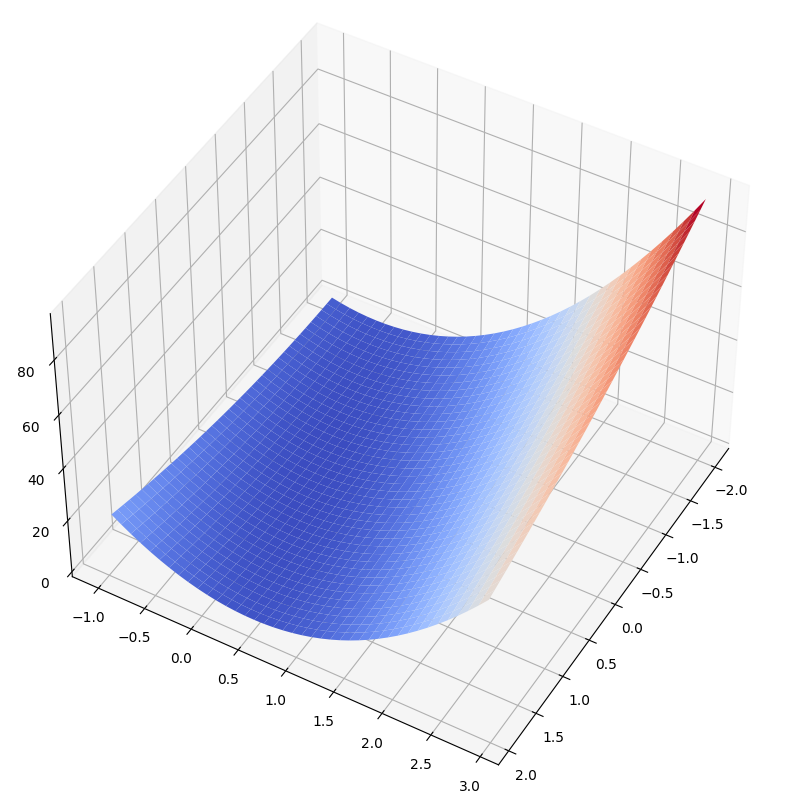

In [ ]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X1 = np.arange(-2, 2, 0.1)
Y1 = np.arange(-1, 3, 0.1)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = f1(np.array([X1,Y1]))

# Рисуем поверхность f1
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm)
plt.show()

In [ ]:
def init_2d(self):
        plt.figure()
        self.ax_2d = plt.subplot(aspect='equal')
        xgrid, ygrid = np.meshgrid(np.linspace(self.bounds[0][0], self.bounds[0][1], 100),
                                    np.linspace(self.bounds[1][0], self.bounds[1][1], 100))
        self.ax_2d.contourf(xgrid, ygrid, self.func([xgrid, ygrid]), cmap = 'Blues', levels=10)

In [ ]:
def draw_2d(self, points):
        self.ax_2d.plot([point[0] for point in points],
                        [point[1] for point in points],
                        color="purple", lw=1, ls='-', marker='o', markersize=4)

In [ ]:
def draw_2d_first_function():
  plt.figure()
  ax_2d = plt.subplot(aspect='equal')
  xgrid, ygrid = np.meshgrid(np.linspace(self.bounds[0][0], self.bounds[0][1], 100),
                                    np.linspace(self.bounds[1][0], self.bounds[1][1], 100))
        self.ax_2d.contourf(xgrid, ygrid, self.func([xgrid, ygrid]), cmap = 'Blues', levels=10)

IndentationError: unexpected indent (<ipython-input-7-e0d32f4a3bea>, line 6)

### Вторая функция

$f_2(x, y) = 10x^2 + 3xy + 17y^2 + 90x + 7y$

$∇f_2(x, y) = ⟨\frac{\partial f_2}{\partial x}, \frac{\partial f_2}{\partial y}⟩,\ \text{где} \\ \frac{\partial f_2}{\partial x} = 20x + 3y + 90 \\ \frac{\partial f_2}{\partial y} = 3x + 34y + 7$

In [ ]:
def f2(parameters):
  global cnt_function
  cnt_function += 1
  x, y = parameters
  return 10 * x * x + 3 * x * y + 17 * y * y + 90 * x + 7 * y

def df2x(parameters):
  global cnt_grad
  cnt_grad += 1
  x, y = parameters
  return 20 * x + 3 * y + 90

def df2y(parameters):
  x, y = parameters
  return 3 * x + 34 * y + 7

График второй функции

In [ ]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X2 = np.arange(-6, -3, 0.1)
Y2 = np.arange(-2, 2, 0.1)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = f2(np.array([X2,Y2]))

# Рисуем поверхность f1
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
plt.show()

## Метод градиентного спуска

Для реализации градиентного спуска с постоянным шагом нам понадобится:
1.   Функция $f(x): E \subseteq \mathbb{R}^n → \mathbb{R}$
2.   Градиент функции $\nabla f(x)$
3.   Величина шага $α_i ∈ \mathbb{R}\quad \forall i \in \{1,\dots,k\}$
4.   Количество итераций $k$
5.   Начальная точка $A_0 \in \mathbb{R}^n$


Тогда наш алгоритм будет реализован как
$$A_{i} = A_{i - 1} - α_i \cdot \nabla f(A_{i - 1}),\qquad i \in \{1,\dots,k\}$$


In [ ]:
def gradient_descent(f, dfx, dfy, x0, y0, alpha_f):
  global alpha, EPS, cnt_grad, cnt_function
  alpha = g_alpha
  x, y = x0, y0
  last = f([x, y])
  num_iters = 0
  while True:
    parameters = np.array([x, y])
    counted_alpha_f = alpha_f(f, dfx, dfy, x, y)
    x, y = x - counted_alpha_f * dfx(parameters), y - counted_alpha_f * dfy(parameters)
    new = f([x, y])
    if (abs(new - last) < EPS or num_iters > 1000):
      break
    last = new
    num_iters += 1
  return x, y, num_iters

Функция, которая позволяет вызвать градиентный спуск для функции $f$ в зависимости от начальных точек $x_0, y_0$ и $α$

In [ ]:
def gradient_task(x0, y0, alpha, f, dfx, dfy):
  x_min, y_min, num_iters = gradient_descent(f, dfx, dfy, x0, y0, alpha)
  parameters = np.array([x_min, y_min])
  print("Минимум функции находится в точке: " + f.__name__ + "(", x_min,", ", y_min, ") = ", f(parameters), "\n",
        " num_iters = ", num_iters, ", cnt_function = ", cnt_function, ", cnt_gradiation = ", cnt_grad, sep = "")

### I. Константный $\alpha$

In [ ]:
def alpha_const(f, dfx, dfy, x, y):
  global alpha
  return alpha

In [ ]:
gradient_task(x0, y0, alpha_const, f1, df1x, df1y)
gradient_task(x0, y0, alpha_const, f2, df2x, df2y)

### II. $\alpha$ на основе тернанрного поиска

In [ ]:
def alpha_ternary(f, dfx, dfy, x, y, EPS=1e-5):
    l = -10
    r = 10
    while r - l > EPS:  # Условие продолжения цикла на основе точности
        m1 = (2 * l + r) / 3
        m2 = (l + 2 * r) / 3
        if f([x - m1 * dfx([x, y]), y - m1 * dfy([x, y])]) > f([x - m2 * dfx([x, y]), y - m2 * dfy([x, y])]):
            l = m1
        else:
            r = m2
    return (l + r) / 2

In [ ]:
gradient_task(x0, y0, alpha_ternary, f1, df1x, df1y)
gradient_task(x0, y0, alpha_ternary, f2, df2x, df2y)

### III. Метод Нелдера-Мида с использованием библиотеки `scipy.optimize`

In [ ]:
z0 = np.array([x0, y0])
res1 = minimize(f1, z0, method='nelder-mead', options={'xatol': EPS, 'disp': True})
z1 = np.array([x0, y0])
res2 = minimize(f2, z1, method='nelder-mead', options={'xatol': EPS, 'disp': True})
print("Минимум функции находится в точке: f1(", res1.x[0],", ", res1.x[1], ") = ", f1(res1.x), sep = "")
print("Минимум функции находится в точке: f2(", res2.x[0],", ", res2.x[1], ") = ", f2(res2.x), sep = "")

## Дополнительное задание 1

Реализовать и исследовать на эффективность ещё один метод одномерного поиска и градиентный спуск на его основе.

Минимизация $\alpha$

In [ ]:
def alpha_minimize(f, dfx, dfy, x, y):
  global alpha
  while f([x, y]) < f([x - alpha * dfx([x, y]), y - alpha * dfy([x, y])]):
    alpha *= 0.8
    if alpha < EPS:
      break
  return alpha

In [ ]:
gradient_task(x0, y0, alpha_minimize, f1, df1x, df1y)
gradient_task(x0, y0, alpha_minimize, f2, df2x, df2y)